# Regression and Model Selection

In this notebook I will demonstrate my understanding of overfitting and underfitting using regression as an example. First I will generate a 1-dimensional feature space and an array of values for each row in the feature space. Then I will create regresion estimators based on linear regression (`x**1`) and polynomial regression (2nd, 4th and 6th degree, i.e. `x**2`, `x**4`  and `x**6`). I will show that the higher the polynomial, the better the fit for the train set, but the worse the fit for the test set. I will visually support my case.

I will re-use code from the [Python Data Science Handbook](http://bit.ly/2y3xzKw). To proof my understanding of the code I am re-using, I will comment on the code in my own words, both in MarkDown cells and in frequent code comment.

## 1. create test data

A random dataset is created.

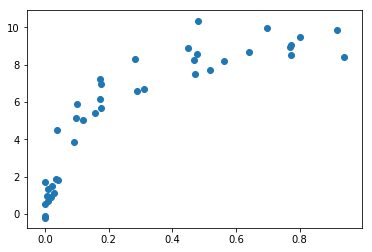

In [5]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

def make_data(N, err=1.0, rseed=1): 
    random = np.random.RandomState(rseed)
    X = random.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * random.randn(N)
    return X, y

X, y = make_data(40)
plt.scatter(X, y) 

## 2. create the regression pipeline
Data of the regression pipeline is visualized.

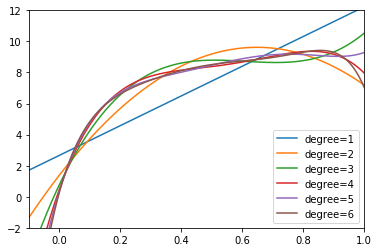

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

for degree in [1, 2, 3, 4, 5, 6]: 
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## 3. show the regressors
As shown in the graph created here, every degree is fitting the datapoints except for degree one which is liniear.

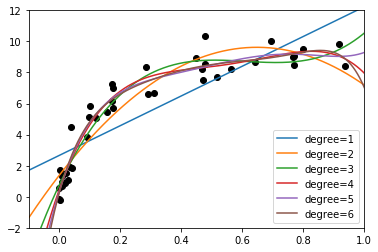

In [8]:
plt.scatter(X.ravel(), y, color='black')
for degree in [1, 2, 3, 4, 5, 6]: 
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## 4. show the validation curve
The validation curve is going to display the difference of the training and validation score. The closer the values are together the better it is.

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


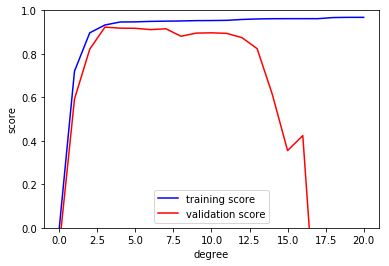

In [9]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## 5. conduct grid search to find the optimal regressor
According to the graphs created, degree three of polynomal regression seems to be the best fitting model.

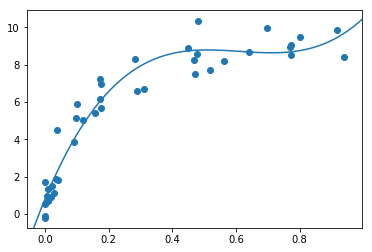

In [10]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);